<a href="https://colab.research.google.com/github/Gabxist/I.C.2/blob/main/An%C3%A1lise_Porto_Alegre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from pandas import read_csv, to_datetime, DataFrame,to_datetime,date_range
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import ccf

# Inicializadores

In [175]:
# Importar repósitorio de GitHub
!rm -r I.C.2
!git clone https://github.com/Gabxist/I.C.2.git
caminho = '/content/I.C.2/data/'

Cloning into 'I.C.2'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 29 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 3.31 MiB | 8.73 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [176]:
gps = read_csv( caminho + 'POAL.csv', sep=',', header=0)
pa = read_csv (caminho + 'DADOS ANA - PORTO ALEGRE.csv', sep=',',header = 0)
hydl = read_csv (caminho +'HYDL-2020-2024.csv', sep=',',header=0)
ntal = read_csv (caminho + 'NTAL-2020-2024.csv', sep=',',header = 0)
ntol = read_csv (caminho + 'NTOL-2020-2024.csv', sep=',',header = 0)
slel = read_csv (caminho + 'SLEL-2020-2024.csv', sep=',',header = 0)

# GPS


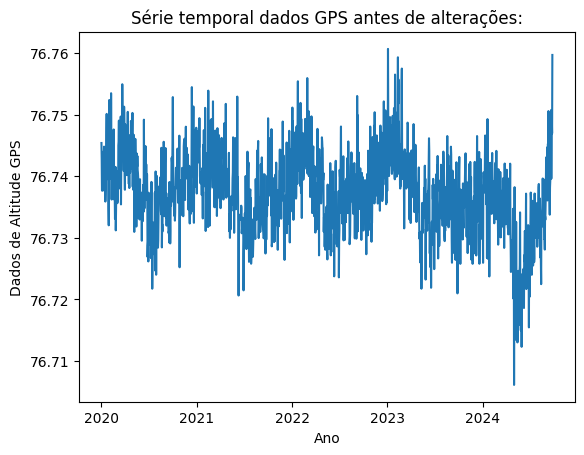

In [135]:
#retirando linhas vazias do dataframe:
gps = gps.dropna(subset = 'Up')
#plotando serie temporal
plt.plot(gps['Decimal Date'], gps['Up'])
plt.xlabel('Ano')
plt.ylabel('Dados de Altitude GPS')
plt.title('Série temporal dados GPS antes de alterações:')
plt.show()

In [136]:
#outliers por IQR (análise inter quartil com coeficiente 1,5):
q1 = gps['Up'].quantile(0.25)
q3 = gps['Up'].quantile(0.75)
iqr = q3 - q1
tol_min = q1 - 1.5 * iqr
tol_max = q3 + 1.5 * iqr
outliers = gps[(gps['Up']<tol_min)|(gps['Up']> tol_max)]
print(f'quantidade de outliers: {len(outliers)}. {outliers}')

quantidade de outliers: 29.                      Date  Decimal Date    MJD           E             N  \
80    2020-03-21 00:00:00   2020.218579  58929 -1905.44488 -3.328321e+06   
739   2022-01-23 00:00:00   2022.060274  59602 -1905.44910 -3.328321e+06   
775   2022-02-28 00:00:00   2022.158904  59638 -1905.45070 -3.328321e+06   
1084  2023-01-03 00:00:00   2023.005479  59947 -1905.45193 -3.328321e+06   
1111  2023-01-30 00:00:00   2023.079452  59974 -1905.45577 -3.328321e+06   
1122  2023-02-10 00:00:00   2023.109589  59985 -1905.45231 -3.328321e+06   
1124  2023-02-12 00:00:00   2023.115068  59987 -1905.45399 -3.328321e+06   
1136  2023-02-24 00:00:00   2023.147945  59999 -1905.45595 -3.328321e+06   
1137  2023-02-25 00:00:00   2023.150685  60000 -1905.45810 -3.328321e+06   
1559  2024-04-27 00:00:00   2024.319672  60427 -1905.45846 -3.328321e+06   
1562  2024-04-30 00:00:00   2024.327869  60430 -1905.45827 -3.328321e+06   
1567  2024-05-05 00:00:00   2024.341530  60435 -1905.46283 -

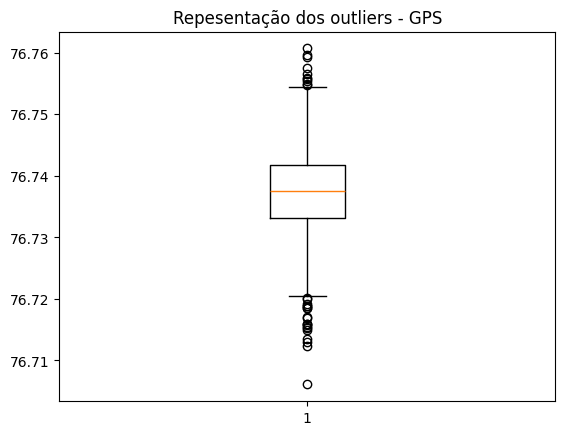

In [137]:
# representação dos Outliers por Boxplot
plt.boxplot(gps['Up'])
plt.title('Repesentação dos outliers - GPS')
plt.show()

In [138]:
# criando novo dataframe com os dados GPS, sem os outliers
gps_o = gps.drop(outliers.index)

In [139]:
#retirando a média
média = np.mean(gps['Up'])
gps['Up'] = gps['Up'] - média
print(f"Média dos dados 'Up': {(np.mean(gps['Up'])):.2f}")
média = np.mean(gps_o['Up'])
gps_o['Up'] = gps_o['Up'] - média
print(f"Média dos dados 'Up' sem outliers: {(np.mean(gps_o['Up'])):.2f}")

Média dos dados 'Up': 0.00
Média dos dados 'Up' sem outliers: -0.00


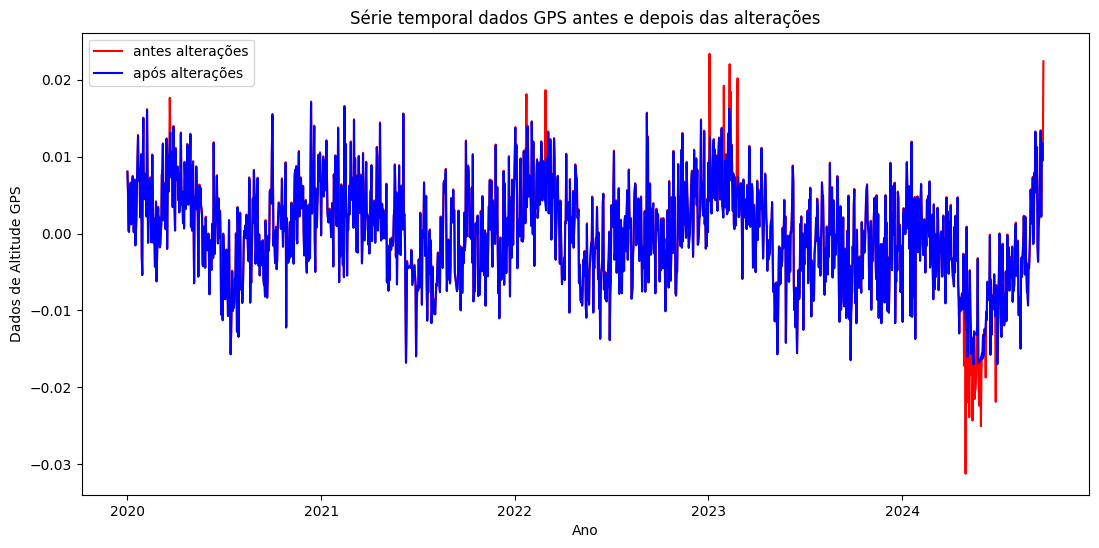

In [140]:
fig, ax = plt.subplots(figsize = (13,6))
ax.plot(gps['Decimal Date'], gps['Up'], 'red',label = "antes alterações")
ax.plot(gps_o['Decimal Date'], gps_o['Up'], 'blue',label = "após alterações")
ax.set(xlabel ='Ano', ylabel = 'Dados de Altitude GPS', title = 'Série temporal dados GPS antes e depois das alterações')
plt.legend()
plt.show()

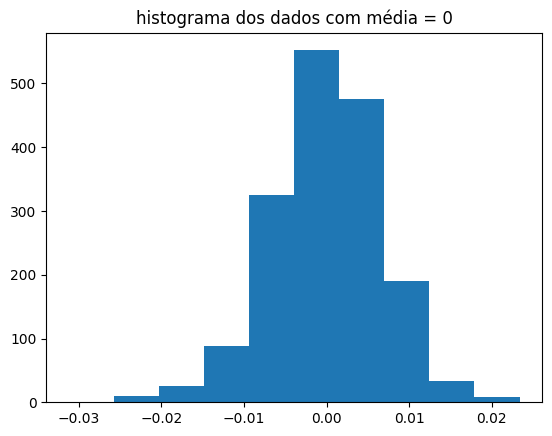

Média dos dados 'Up': 0.00


In [141]:
plt.hist(gps['Up'])
plt.title('histograma dos dados com média = 0')
plt.show()
print(f"Média dos dados 'Up': {(np.mean(gps['Up'])):.2f}")

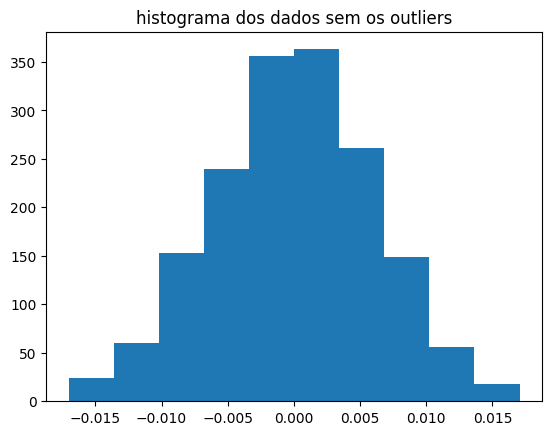

Média dos dados 'Up': -0.00


In [142]:
plt.hist(gps_o['Up'])
plt.title('histograma dos dados sem os outliers')
plt.show()
print(f"Média dos dados 'Up': {(np.mean(gps_o['Up'])):.2f}")

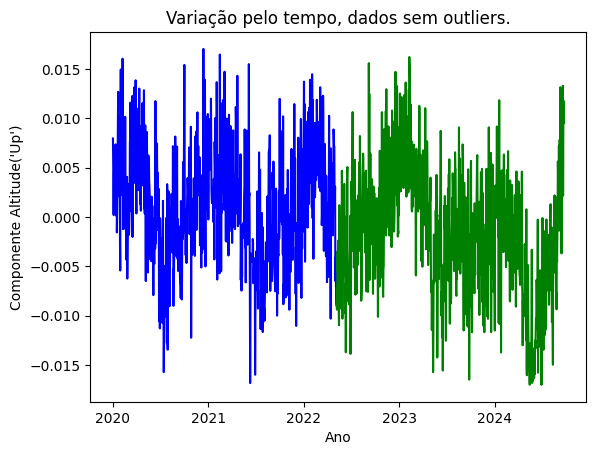

primeira metade, variância = 0.00 média = 0.00
segunda metade, variância = 0.00 média = -0.00
Falhou em rejeitar a hipótese nula de variância igual entre grupos.
P-valor: 0.16862.


In [143]:
#plotando a serie temporal em duas metades e calculando a hipotese de variancia nula entre as metades:
metade = round(len(gps_o)/2)
div1, div2 = gps_o['Up'].to_numpy()[0:metade], gps_o['Up'].to_numpy()[metade:]
time1, time2 = gps_o["Decimal Date"].to_numpy()[0:metade], gps_o["Decimal Date"].to_numpy()[metade:]
plt.plot(time1, div1, color = 'blue')
plt.plot(time2, div2, color = 'green')
plt.title("Variação pelo tempo, dados sem outliers.")
plt.ylabel("Componente Altitude('Up')")
plt.xlabel("Ano")
plt.show()
print(f"primeira metade, variância = {div1.var():.2f} média = {div1.mean():.2f}")
print(f"segunda metade, variância = {div2.var():.2f} média = {div2.mean():.2f}")
if levene(div1, div2)[1] < 0.05:
  print('Rejeita a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')
else:
  print('Falhou em rejeitar a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')

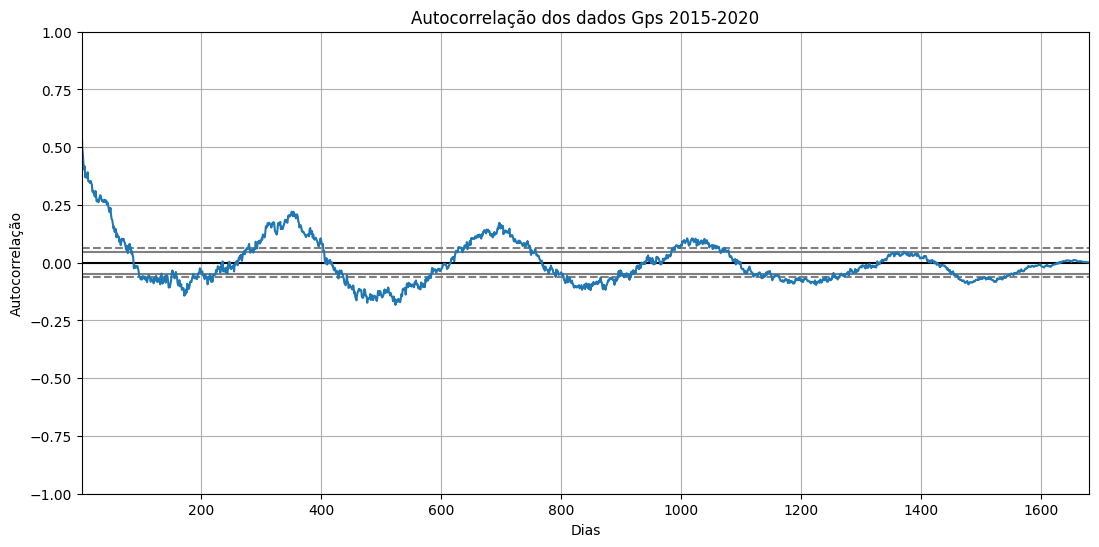

In [144]:
# Utilizando apenas os ultimos 5 anos de dados
ult_5_anos_gps = gps_o[(gps_o["Decimal Date"])>2015]
#Plotando o grafico de Autocorrelação entre os dados GPS
plt.figure(figsize = (13,6))
autocorrelation_plot(ult_5_anos_gps['Up'])
plt.xlabel('Dias')
plt.ylabel('Autocorrelação')
plt.title("Autocorrelação dos dados Gps 2015-2020")
plt.show()

# Hydl

In [145]:
print(hydl)

                     Date  Decimal Date      MJD        Up
0     2020-01-01 12:00:00   2020.001369  58849.5  0.007892
1     2020-01-02 12:00:00   2020.004107  58850.5  0.007837
2     2020-01-03 12:00:00   2020.006845  58851.5  0.007854
3     2020-01-04 12:00:00   2020.009582  58852.5  0.007884
4     2020-01-05 12:00:00   2020.012320  58853.5  0.007940
...                   ...           ...      ...       ...
1822  2024-12-27 12:00:00   2024.989733  60671.5  0.011677
1823  2024-12-28 12:00:00   2024.992471  60672.5  0.011800
1824  2024-12-29 12:00:00   2024.995209  60673.5  0.011870
1825  2024-12-30 12:00:00   2024.997947  60674.5  0.011958
1826  2024-12-31 12:00:00   2025.000684  60675.5  0.012003

[1827 rows x 4 columns]


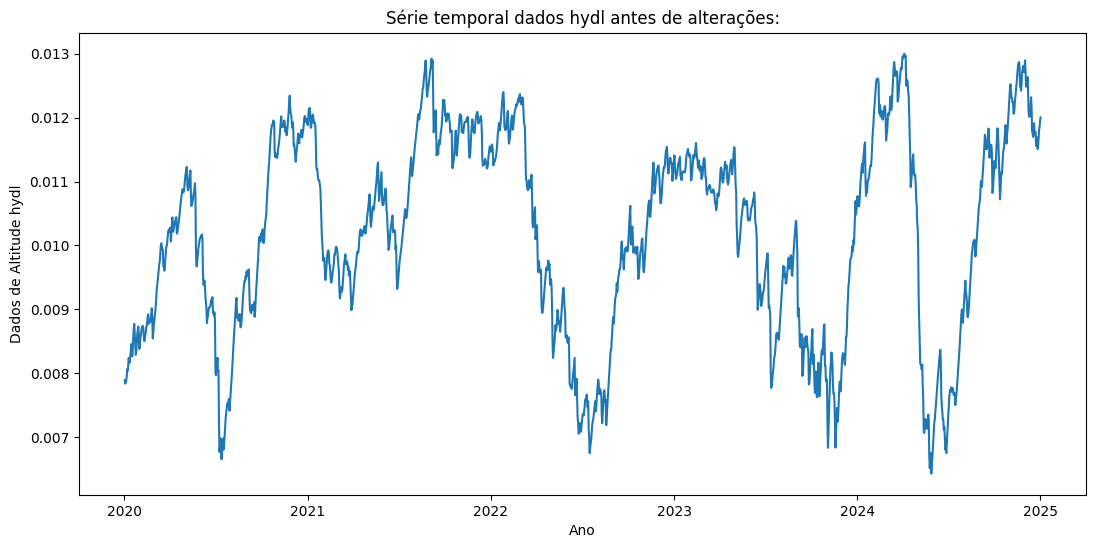

In [146]:
#retirando linhas vazias do dataframe:
hydl = hydl.dropna(subset = 'Up')
#plotando serie temporal
plt.figure(figsize = (13,6))
plt.plot(hydl['Decimal Date'], hydl['Up'])
plt.xlabel('Ano')
plt.ylabel('Dados de Altitude hydl')
plt.title('Série temporal dados hydl antes de alterações:')
plt.show()

In [147]:
#outliers por IQR (análise inter quartil com coeficiente 1,5):
q1 = hydl['Up'].quantile(0.25)
q3 = hydl['Up'].quantile(0.75)
iqr = q3 - q1
tol_min = q1 - 1.5 * iqr
tol_max = q3 + 1.5 * iqr
outliers = hydl[(hydl['Up']<tol_min)|(hydl['Up']> tol_max)]
print(outliers)

Empty DataFrame
Columns: [Date, Decimal Date, MJD, Up]
Index: []


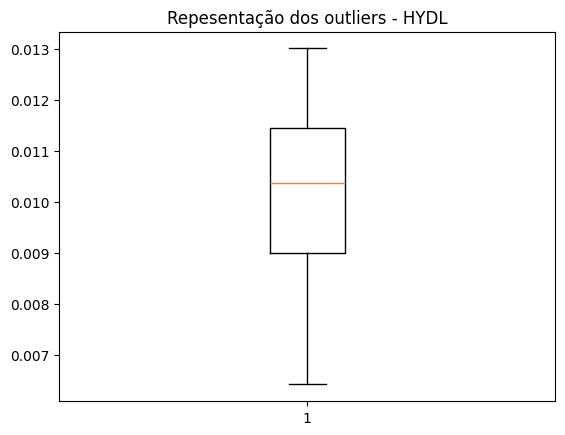

In [148]:
# representação dos Outliers por Boxplot
plt.boxplot(hydl['Up'])
plt.title('Repesentação dos outliers - HYDL')
plt.show()

In [149]:
# observa-se que não há outliers


In [150]:
#retirando a média
média = np.mean(hydl['Up'])
hydl['Up'] = hydl['Up'] - média
print(f"Média dos dados 'Up': {(np.mean(hydl['Up'])):.2f}")

Média dos dados 'Up': 0.00


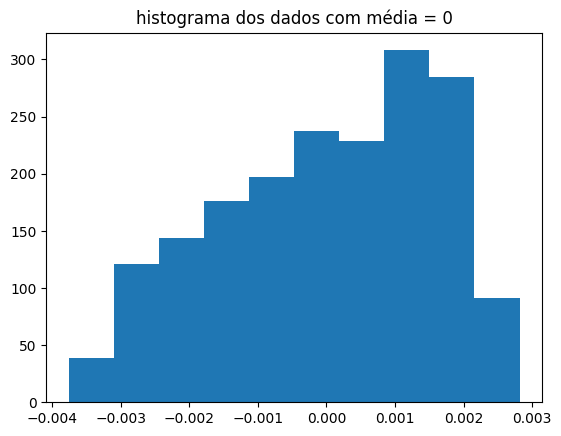

Média dos dados 'Up': 0.00


In [151]:
plt.hist(hydl['Up'])
plt.title('histograma dos dados com média = 0')
plt.show()
print(f"Média dos dados 'Up': {(np.mean(hydl['Up'])):.2f}")

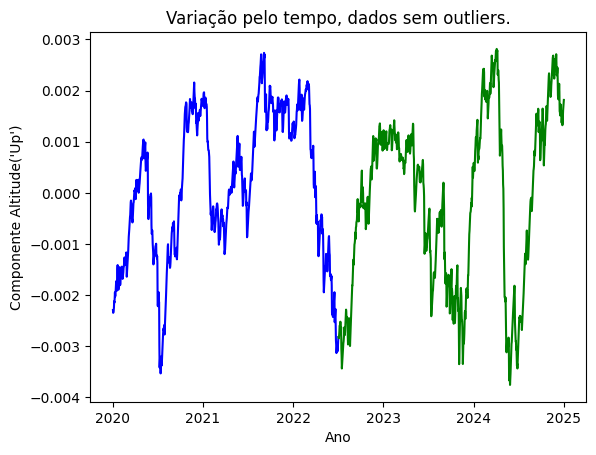

primeira metade, variância = 0.00 média = 0.00
segunda metade, variância = 0.00 média = -0.00
Rejeita a hipótese nula de variância igual entre grupos.
P-valor: 0.00000.


In [152]:
#plotando a serie temporal em duas metades e calculando a hipotese de variancia nula entre as metades:
metade = round(len(hydl)/2)
div1, div2 = hydl['Up'].to_numpy()[0:metade], hydl['Up'].to_numpy()[metade:]
time1, time2 = hydl["Decimal Date"].to_numpy()[0:metade], hydl["Decimal Date"].to_numpy()[metade:]
plt.plot(time1, div1, color = 'blue')
plt.plot(time2, div2, color = 'green')
plt.title("Variação pelo tempo, dados sem outliers.")
plt.ylabel("Componente Altitude('Up')")
plt.xlabel("Ano")
plt.show()
print(f"primeira metade, variância = {div1.var():.2f} média = {div1.mean():.2f}")
print(f"segunda metade, variância = {div2.var():.2f} média = {div2.mean():.2f}")
if levene(div1, div2)[1] < 0.05:
  print('Rejeita a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')
else:
  print('Falhou em rejeitar a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')

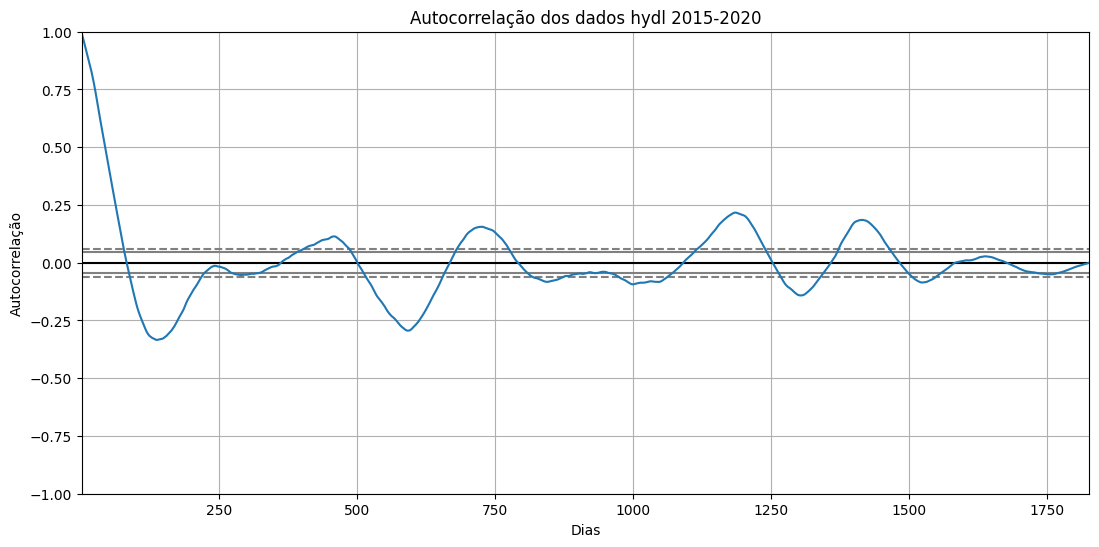

In [153]:
# Utilizando apenas os ultimos 5 anos de dados
ult_5_anos_hydl =hydl[(hydl["Decimal Date"])>2015]
#Plotando o grafico de Autocorrelação entre os dados hydl
plt.figure(figsize = (13,6))
autocorrelation_plot(ult_5_anos_hydl['Up'])
plt.xlabel('Dias')
plt.ylabel('Autocorrelação')
plt.title("Autocorrelação dos dados hydl 2015-2020")
plt.show()

# Dados ANA - Porto Alegre


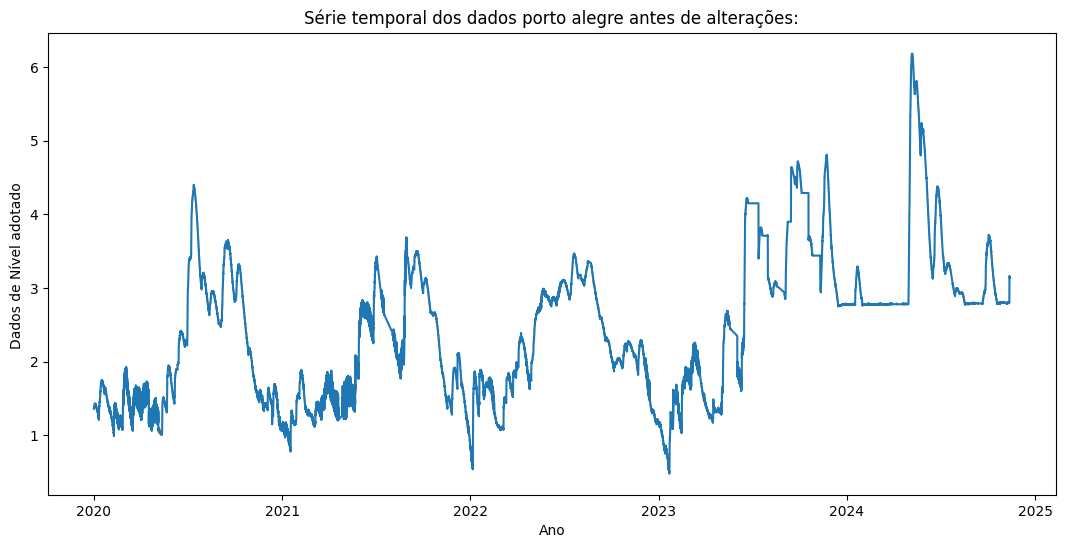

In [177]:
#normalizando a coluna U conforme dados U GPS, pois os dados estão em cm
pa['Up'] = pa['Up']/100
#retirando as linhas vazias
pa = pa.dropna(subset = ['Up'])
#plotando serie temporal
plt.figure(figsize = (13,6))
plt.plot(pa['Decimal Date'],pa['Up'])
plt.xlabel('Ano')
plt.ylabel('Dados de Nível adotado ')
plt.title('Série temporal dos dados porto alegre antes de alterações:')
plt.show()

In [178]:
#outliers por IQR (análise inter quartil com coeficiente 1,5):
q1 = pa['Up'].quantile(0.25)
q3 = pa['Up'].quantile(0.75)
iqr = q3 - q1
tol_min = q1 - 1.5 * iqr
tol_max = q3 + 1.5 * iqr
outliers = pa[(pa['Up']<tol_min)|(pa['Up']> tol_max)]
print(f"quantidade de outliers ={len(outliers)}, {outliers}")

quantidade de outliers =2403,                        Date  Decimal Date           MJD    Up
137514  2024-05-02 15:30:00   2024.335786  60432.645833  5.02
137515  2024-05-02 15:45:00   2024.335815  60432.656250  5.02
137516  2024-05-02 16:00:00   2024.335843  60432.666667  5.03
137517  2024-05-02 16:15:00   2024.335872  60432.677083  5.04
137518  2024-05-02 16:30:00   2024.335900  60432.687500  5.05
...                     ...           ...           ...   ...
140091  2024-05-29 11:45:00   2024.409280  60459.489583  5.02
140092  2024-05-29 12:00:00   2024.409309  60459.500000  5.02
140093  2024-05-29 12:15:00   2024.409337  60459.510417  5.02
140094  2024-05-29 12:30:00   2024.409366  60459.520833  5.02
140095  2024-05-29 12:45:00   2024.409394  60459.531250  5.02

[2403 rows x 4 columns]


In [179]:
# criando novo dataframe com os dados GPS, sem os outliers
pa_o = pa.drop(outliers.index)

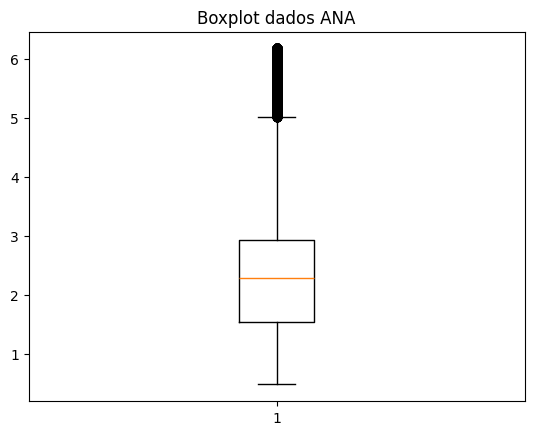

In [180]:
#representação de outliers por Boxplot
plt.boxplot(pa['Up'])
plt.title('Boxplot dados ANA')
plt.show()

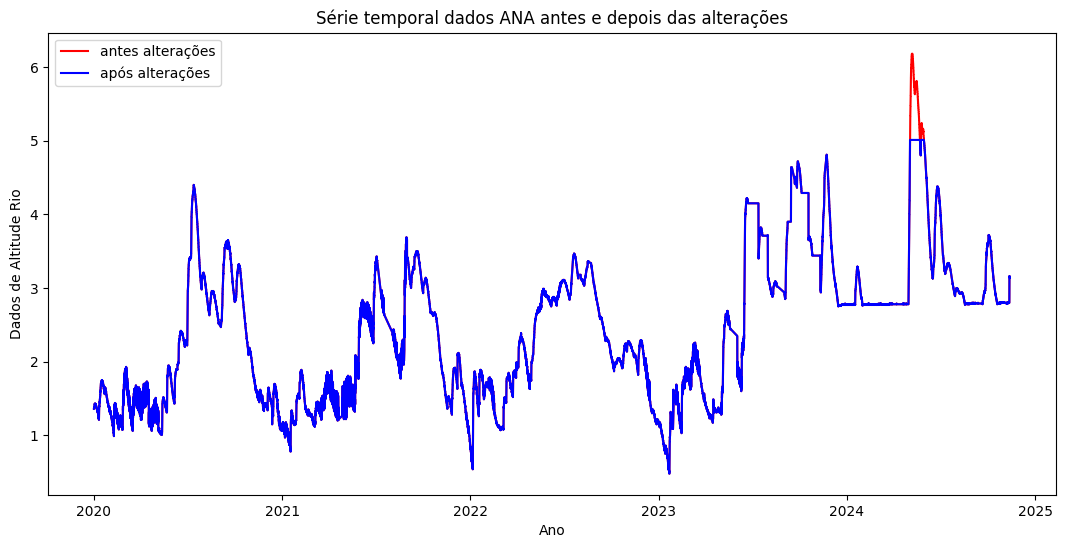

In [181]:
fig, ax = plt.subplots(figsize = (13,6))
ax.plot(pa['Decimal Date'], pa['Up'], 'red',label = "antes alterações")
ax.plot(pa_o['Decimal Date'], pa_o['Up'], 'blue',label = "após alterações")
ax.set(xlabel ='Ano', ylabel = 'Dados de Altitude Rio', title = 'Série temporal dados ANA antes e depois das alterações')
plt.legend()
plt.show()

In [182]:
#retirando a média
média = np.mean(pa['Up'])
pa['Up'] = pa['Up'] - média
print(f"Média dos dados 'Up': {(np.mean(pa['Up'])):.2f}")
#retirando a média
média = np.mean(pa_o['Up'])
pa_o['Up'] = pa_o['Up'] - média
print(f"Média dos dados 'Up'sem outliers: {(np.mean(pa_o['Up'])):.2f}")

Média dos dados 'Up': 0.00
Média dos dados 'Up'sem outliers: 0.00


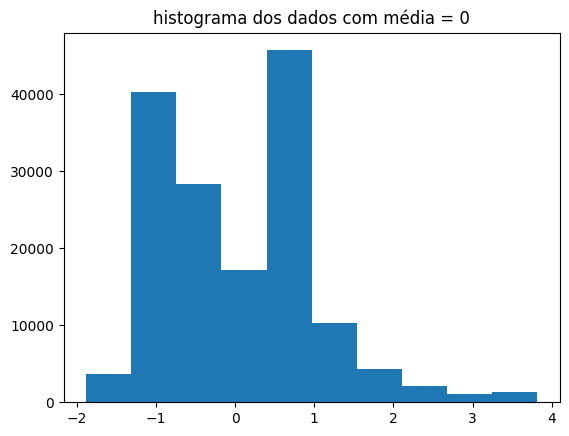

média dos dados 'Up': 0.00


In [183]:
plt.hist(pa['Up'])
plt.title('histograma dos dados com média = 0')
plt.show()
print(f"média dos dados 'Up': {(np.mean(pa_o['Up'])):.2f}")

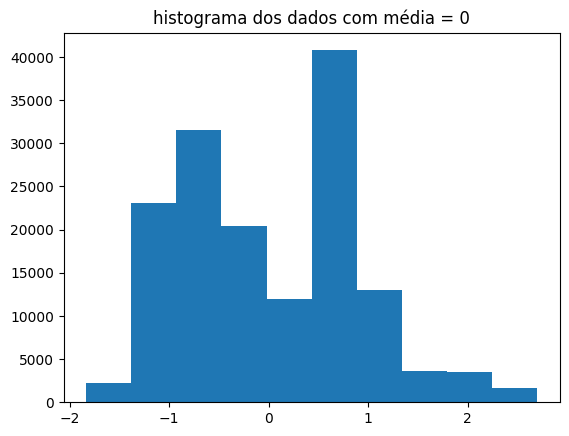

média dos dados 'Up': 0.00


In [184]:
plt.hist(pa_o['Up'])
plt.title('histograma dos dados com média = 0')
plt.show()
print(f"média dos dados 'Up': {(np.mean(pa_o['Up'])):.2f}")

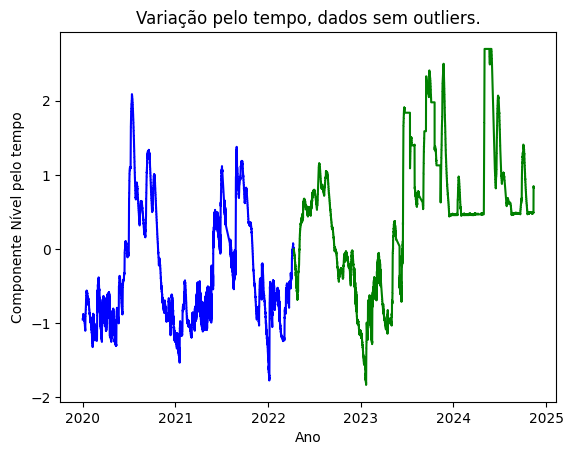

primeira metade, variância = 0.58 média = -0.34
segunda metade, variância = 0.68 média = 0.34
Falhou em rejeitar a hipótese nula de variância igual entre grupos.
P-valor: 0.22717.


In [185]:
# Análise dos dados por Variância igual entre grupos
metade = round(len(pa_o)/2)
div1, div2 = pa_o['Up'].to_numpy()[0:metade], pa_o['Up'].to_numpy()[metade:]
time1, time2 = pa_o['Decimal Date'].to_numpy()[0:metade], pa_o['Decimal Date'].to_numpy()[metade:]
plt.plot(time1, div1, color = 'blue')
plt.plot(time2, div2, color = 'green')
plt.title("Variação pelo tempo, dados sem outliers.")
plt.ylabel("Componente Nível pelo tempo")
plt.xlabel("Ano")
plt.show()
print(f"primeira metade, variância = {div1.var():.2f} média = {div1.mean():.2f}")
print(f"segunda metade, variância = {div2.var():.2f} média = {div2.mean():.2f}")
if levene(div1, div2)[1] < 0.05:
  print('Rejeita a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')
else:
  print('Falhou em rejeitar a hipótese nula de variância igual entre grupos.')
  print(f'P-valor: {levene(div1, div2)[1]:.5f}.')

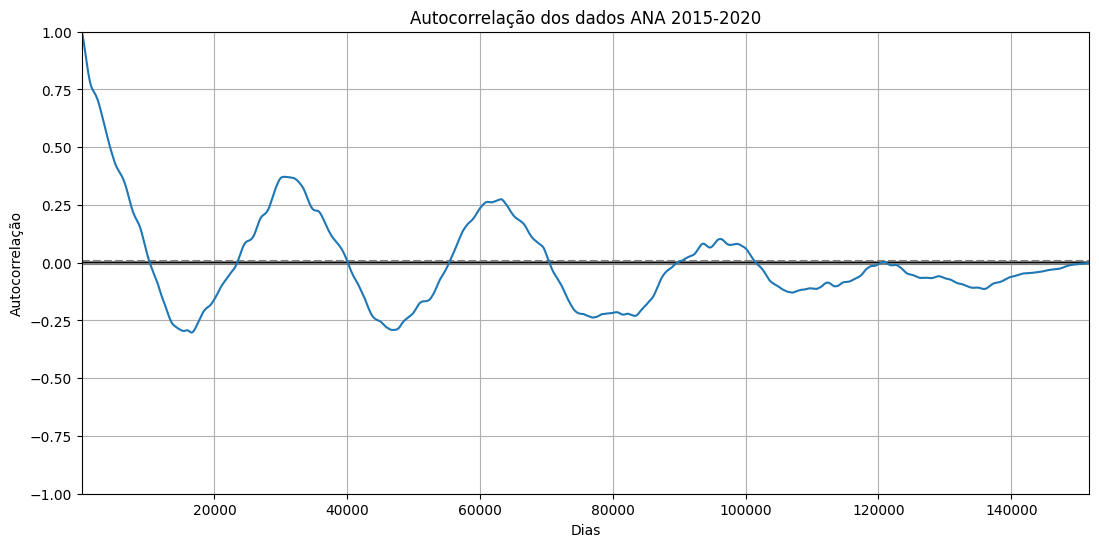

In [186]:
# Autocorrelação entre os dados
ult_5_anos_rio = pa_o[(pa_o['Decimal Date'])>2015]
plt.figure(figsize = (13,6))
autocorrelation_plot(ult_5_anos_rio['Up'])
plt.xlabel('Dias')
plt.ylabel('Autocorrelação')
plt.title("Autocorrelação dos dados ANA 2015-2020")
plt.show()

# Correlação Cruzada

In [193]:
#Criando um dataframe juntando os dados dos dois dataframes com os dados dos ultimos 5 anos:
# função para facilitar o tratamento dos dados:
def mudar_dados (nome):
  nome['Datetime'] = to_datetime(nome['Date'],format="%Y-%m-%d %H:%M:%S")
  nome.set_index(['Datetime'],inplace=True)
  return nome

aux1 = ult_5_anos_gps.copy()
aux2 = ult_5_anos_hydl.copy()
aux3 = ult_5_anos_rio.copy()
aux1 = mudar_dados(aux1)
aux2 = mudar_dados(aux2)
aux3 = mudar_dados(aux3)
juntos = aux2.join(aux3['Up'], how='left', lsuffix = ' hydl',rsuffix=' rio')
juntos = juntos.join(aux2['Up'], how='left')
juntos = juntos.dropna()

In [194]:
print(juntos)

                                    Date  Decimal Date      MJD   Up hydl  \
Datetime                                                                    
2020-01-01 12:00:00  2020-01-01 12:00:00   2020.001369  58849.5 -0.002294   
2020-01-02 12:00:00  2020-01-02 12:00:00   2020.004107  58850.5 -0.002349   
2020-01-03 12:00:00  2020-01-03 12:00:00   2020.006845  58851.5 -0.002332   
2020-01-04 12:00:00  2020-01-04 12:00:00   2020.009582  58852.5 -0.002303   
2020-01-05 12:00:00  2020-01-05 12:00:00   2020.012320  58853.5 -0.002246   
...                                  ...           ...      ...       ...   
2024-11-07 12:00:00  2024-11-07 12:00:00   2024.852841  60621.5  0.001875   
2024-11-08 12:00:00  2024-11-08 12:00:00   2024.855578  60622.5  0.001886   
2024-11-09 12:00:00  2024-11-09 12:00:00   2024.858316  60623.5  0.001965   
2024-11-10 12:00:00  2024-11-10 12:00:00   2024.861054  60624.5  0.002097   
2024-11-11 12:00:00  2024-11-11 12:00:00   2024.863792  60625.5  0.002162   

In [195]:
# exportando como arquivo xlsx para análise "manual"
#não é extritamente nescessário, mas eu optei por analisar manualmente inicialmente
juntos.to_excel('/content/I.C.2/teste.xlsx')

In [191]:
'''
#Utilizando a normalização por Z-score para ajustar os dados para que fique visível a representação junta
juntos['U gps'] = (juntos['U gps']-juntos['U gps'].mean() )/juntos['U gps'].std()
juntos['U hydl'] = (juntos['U hydl']-juntos['U hydl'].mean())/juntos['U hydl'].std()
juntos['Up'] = (juntos['Up']-juntos['Up'].mean())/juntos['Up'].std()
'''

"\n#Utilizando a normalização por Z-score para ajustar os dados para que fique visível a representação junta\njuntos['U gps'] = (juntos['U gps']-juntos['U gps'].mean() )/juntos['U gps'].std()\njuntos['U hydl'] = (juntos['U hydl']-juntos['U hydl'].mean())/juntos['U hydl'].std()\njuntos['Up'] = (juntos['Up']-juntos['Up'].mean())/juntos['Up'].std()\n"

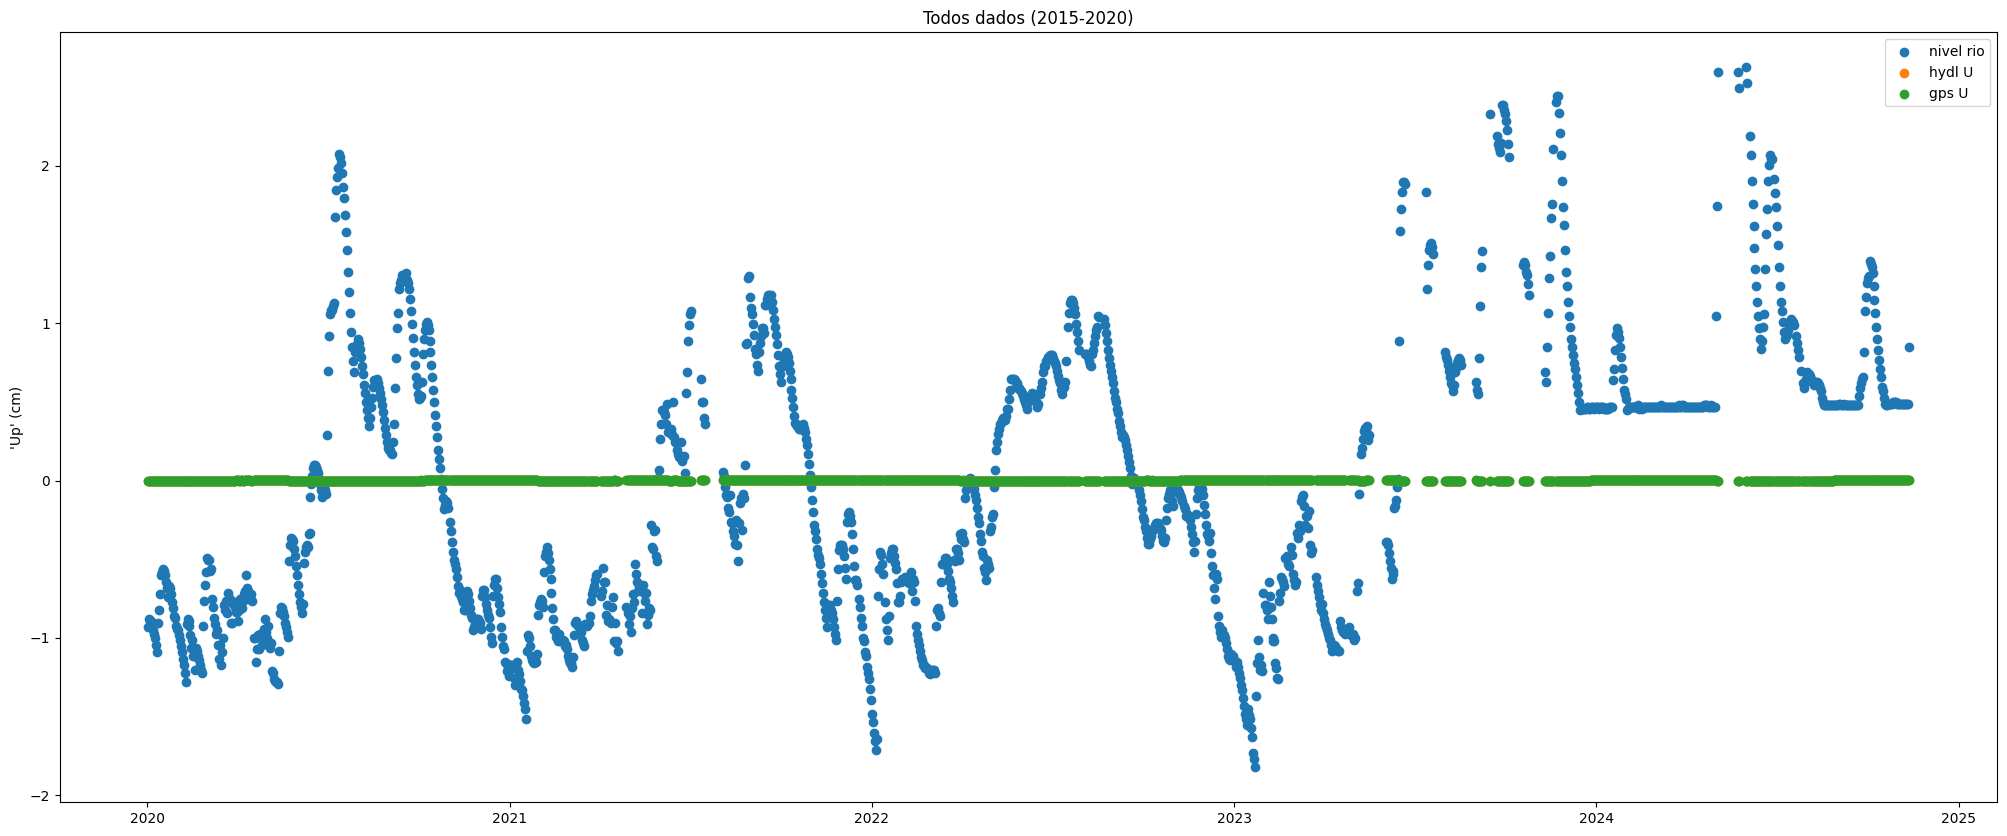

In [196]:
#Plotando as séries em uma imagem só
plt.figure(figsize = (25,10))
plt.scatter(juntos['Decimal Date'],juntos['Up rio'], label= 'nivel rio')
plt.scatter(juntos['Decimal Date'],juntos['Up hydl'], label = 'hydl U')
plt.scatter(juntos['Decimal Date'],juntos['Up'],label =  'gps U' )
plt.ylabel("'Up' (cm)")
plt.title('Todos dados (2015-2020)')
plt.legend()
plt.show()

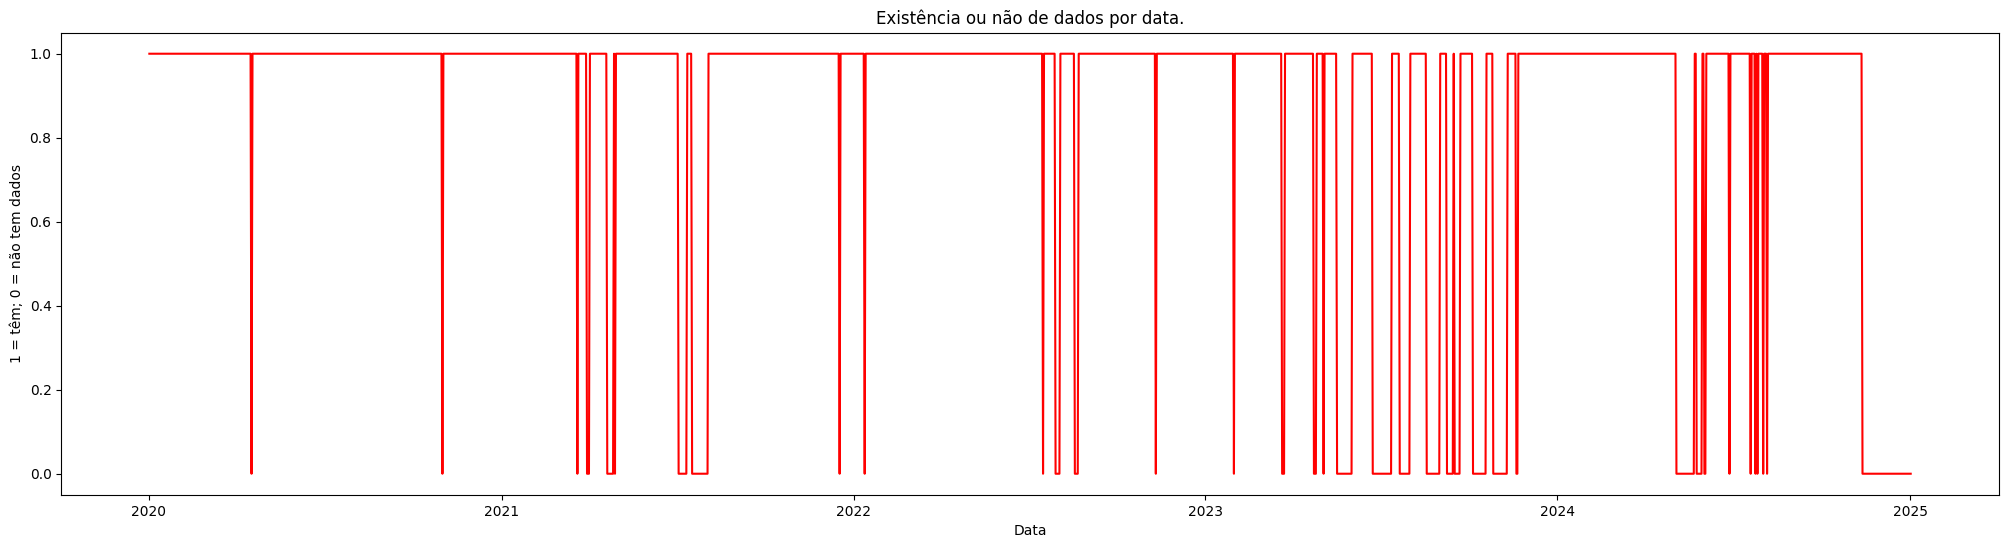

In [198]:
# Criar o dataframe com todas as datas dentro do intervalo dos dados observados
lista_datas = date_range(start='2020-01-01 12:00', end='2025-01-01 12:00', freq='1d')
datas = DataFrame(index=lista_datas)

# Identificar datas faltantes
datas["presente"] = datas.index.isin(juntos.index)

#plotar data/Boleano:
plt.figure(figsize=(25,6))
plt.plot(datas.index, datas['presente'], color='r')
plt.title("Existência ou não de dados por data.")
plt.ylabel('1 = têm; 0 = não tem dados')
plt.xlabel('Data')
plt.show()


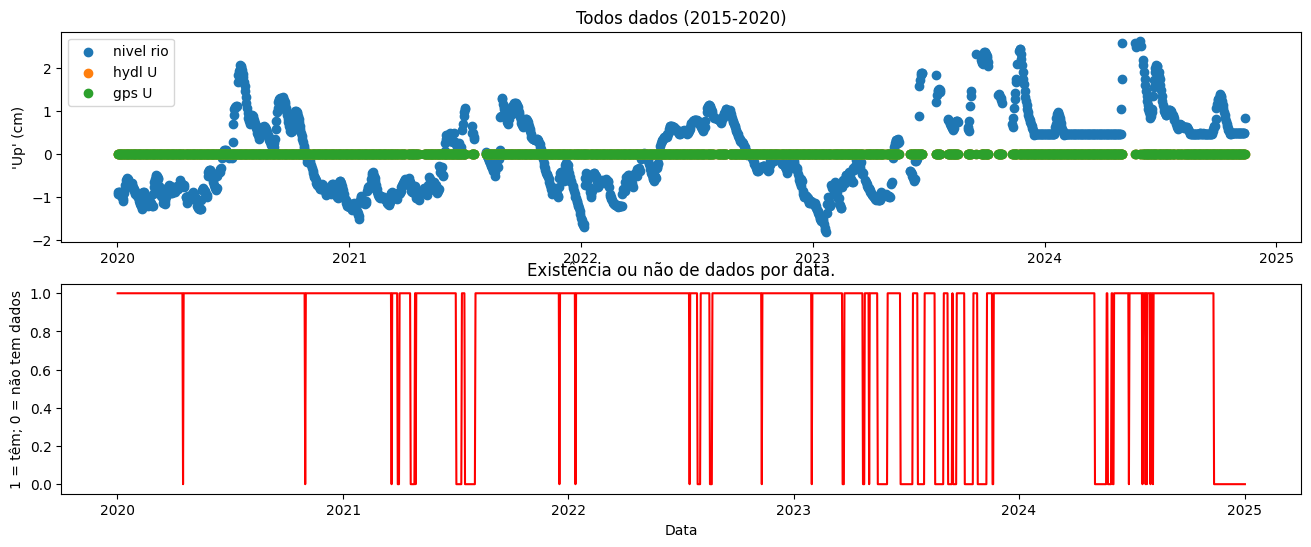

In [201]:
fig, ax = plt.subplots(2,1, figsize=(16,6))
ax[0].scatter(juntos['Decimal Date'],juntos['Up rio'], label= 'nivel rio')
ax[0].scatter(juntos['Decimal Date'],juntos['Up hydl'], label = 'hydl U')
ax[0].scatter(juntos['Decimal Date'],juntos['Up'],label =  'gps U' )
ax[0].set_ylabel("'Up' (cm)")
ax[0].set_title('Todos dados (2015-2020)')
ax[1].plot(datas.index, datas['presente'], color='r')
ax[1].set_title("Existência ou não de dados por data.")
ax[1].set_ylabel('1 = têm; 0 = não tem dados')
ax[1].set_xlabel('Data')
ax[0].legend()
plt.show()

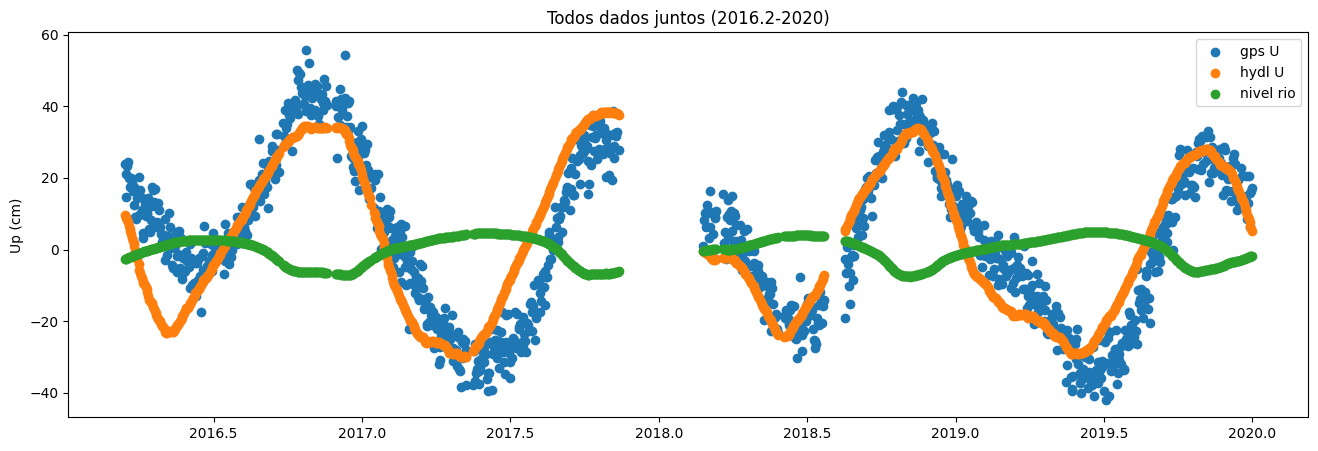

In [ ]:
#Observa-se quebra de dados
juntos = juntos[(juntos['Decimal Date'])>2016.2]
#plotando os dados em conjunto
plt.figure(figsize=(16,5))
plt.scatter(juntos['Decimal Date'],juntos['U gps'], label= 'gps U')
plt.scatter(juntos['Decimal Date'],juntos['U hydl'], label = 'hydl U' )
plt.scatter(juntos['Decimal Date'],juntos['Up'],label =  'nivel rio' )
plt.title('Todos dados juntos (2016.2-2020)')
plt.ylabel('Up (cm)')
plt.legend()
plt.show()

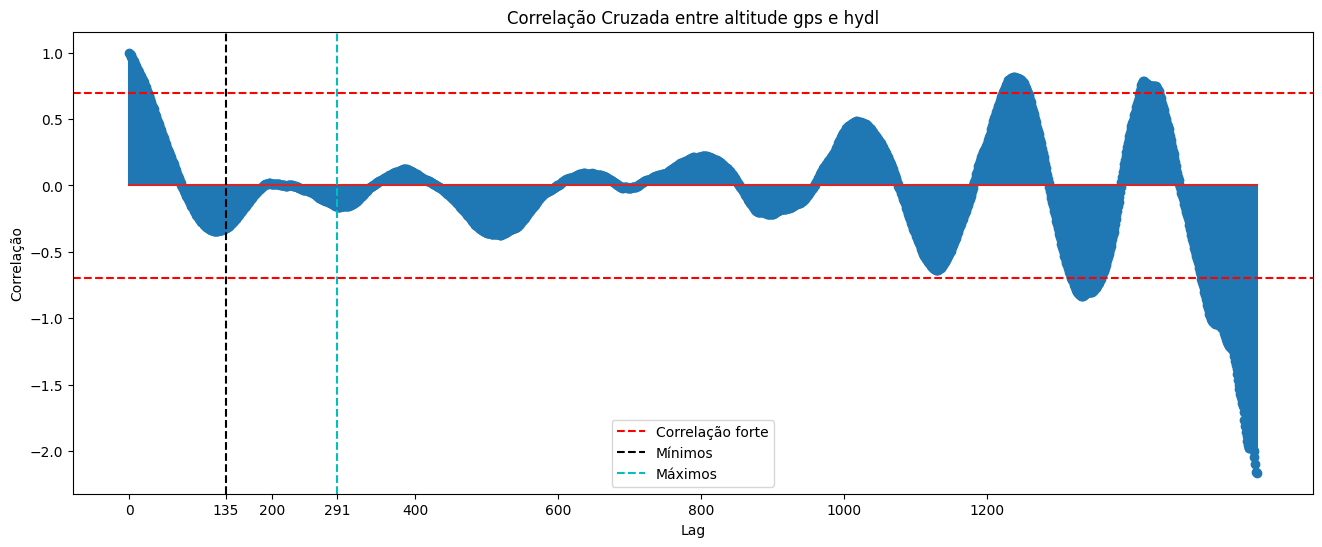

dias das correlações iniciais hydl e gps: 0.0028296299278735993 dias 0.003916120156645801 dias


In [205]:
#Calculando a correlação cruzada entre 'U hydl' e 'U Gps'
corr_hydlgps = ccf(juntos['Up hydl'], juntos['Up'])
#para determinar os minimos e maximos:
"""
maximo=[]
minimo=[]
numero=[]
for i in range(0,1200,100):
  numero.append(i)
  print(len(numero))
for i in range(len(numero)-1):
  intervalo = corr_hydlgps[numero[i]:numero[i+1]]
  if max(intervalo)>0.4:
    maximo.append(np.where(corr_hydlgps == max(intervalo)))
  elif min(intervalo)<-0.4:
    minimo.append(np.where(corr_hydlgps == min(intervalo)))

print(f'min{minimo}')
print(f'max{maximo}')

print(np.where(corr_hydlgps == max(corr_hydlgps[1000:1200])))
"""
# Plotando a correlação cruzada
plt.figure(figsize = (16,6))
plt.stem(range(len(corr_hydlgps)), corr_hydlgps)
plt.title('Correlação Cruzada entre altitude gps e hydl')
plt.axhline(y=0.7,color='red', linestyle='--', label = 'Correlação forte')
plt.axhline(y=-0.7,color='red', linestyle='--')
a = 135
b = 291
plt.axvline(a,color='black', linestyle='--', label = 'Mínimos')
plt.axvline(b,color='c', linestyle='--', label = 'Máximos' )
plt.xlabel('Lag')
plt.ylabel('Correlação')
x = range(0, 1201, 200)
plt.xticks(list(x) +[a,b])
plt.legend()
plt.show()
print('dias das correlações iniciais hydl e gps:',juntos.iloc[a,3]-juntos.iloc[0,3],'dias',juntos.iloc[b,3]-juntos.iloc[0,3],'dias')

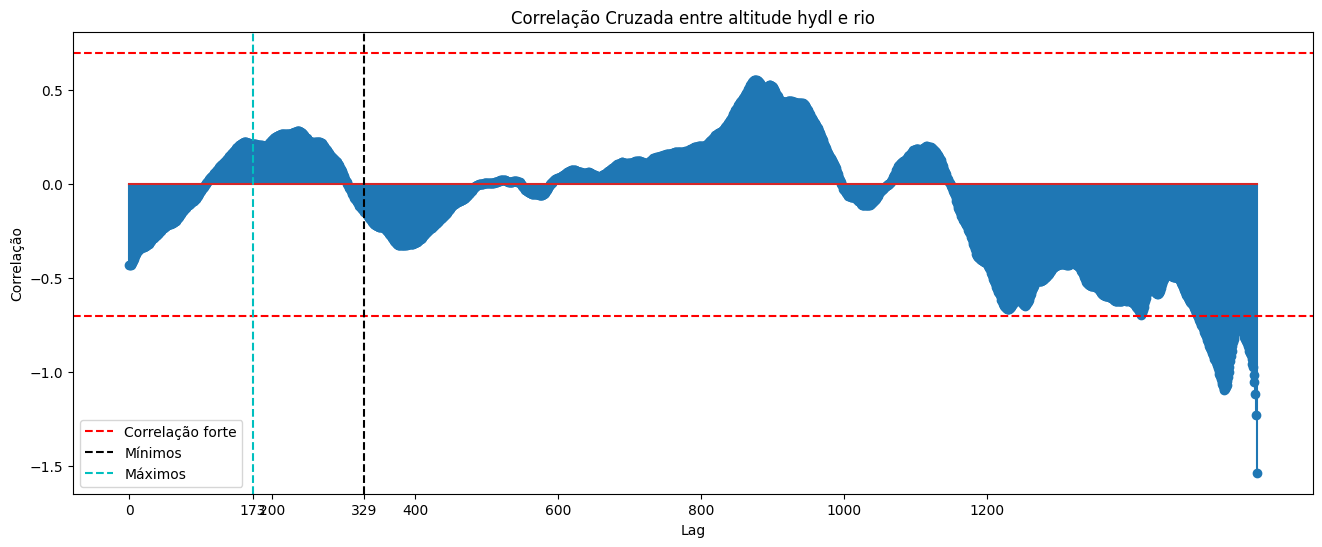

dias das correlações iniciais hydl e rio: 0.0012757144868373992 dias 0.0041729733347893 dias


In [203]:
#Calculando a correlação cruzada entre 'U hydl' e 'U rio'
corr_hydlrio = ccf(juntos['Up rio'], juntos['Up hydl'])

#para determinar os minimos e maximos:
"""maximo=[]
minimo=[]
numero=[]
for i in range(0,1200,100):
  numero.append(i)
  print(len(numero))
for i in range(len(numero)-1):
  intervalo = corr_hydlrio[numero[i]:numero[i+1]]
  if max(intervalo)>0.5:
    maximo.append(np.where(corr_hydlrio == max(intervalo)))
  elif min(intervalo)<-0.5:
    minimo.append(np.where(corr_hydlrio == min(intervalo)))

print(f'min{minimo}')
print(f'max{maximo}')

print(np.where(corr_hydlrio == max(corr_hydlrio[1000:1200])))
"""
# Plotando a correlação cruzada
plt.figure(figsize = (16,6))
plt.stem(range(len(corr_hydlrio)), corr_hydlrio)
plt.title('Correlação Cruzada entre altitude hydl e rio')
plt.axhline(y=0.7,color='red', linestyle='--', label = 'Correlação forte')
plt.axhline(y=-0.7,color='red', linestyle='--')
a = 329
b = 173
plt.axvline(a,color='black', linestyle='--', label = 'Mínimos')
plt.axvline(b,color='c', linestyle='--', label = 'Máximos' )
plt.xlabel('Lag')
plt.ylabel('Correlação')
x = range(0, 1201, 200)
plt.xticks(list(x) +[a,b])
plt.legend()
plt.show()
print('dias das correlações iniciais hydl e rio:',juntos.iloc[b,3]-juntos.iloc[0,3],'dias',juntos.iloc[a,3]-juntos.iloc[0,3],'dias')

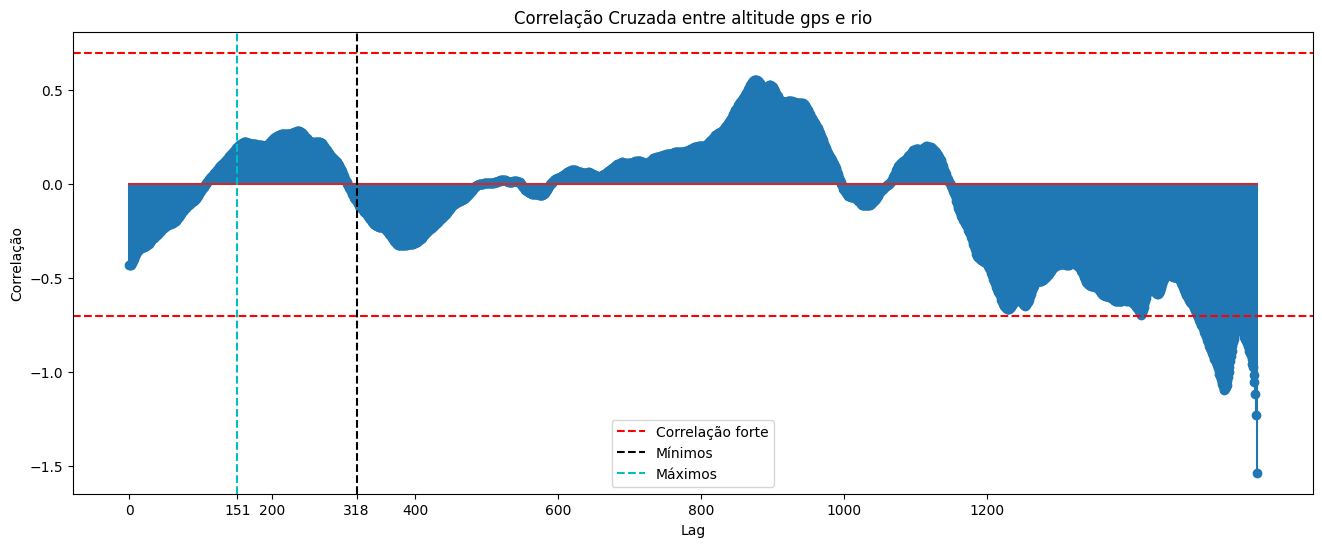

dias das correlações iniciais gps e rio: 0.0022552199661731998 dias 0.0038895038887859 dias


In [204]:
#Calculando a correlação cruzada entre 'U gps' e 'U rio'
corr_gpsrio = ccf(juntos['Up rio'], juntos['Up'])
#para determinar os minimos e maximos:
"""
maximo=[]
minimo=[]
numero=[]
for i in range(0,1200,100):
  numero.append(i)
  print(len(numero))
for i in range(len(numero)-1):
  intervalo = corr_gpsrio[numero[i]:numero[i+1]]
  if max(intervalo)>0.5:
    maximo.append(np.where(corr_gpsrio == max(intervalo)))
  elif min(intervalo)<-0.25:
    minimo.append(np.where(corr_gpsrio == min(intervalo)))

print(f'min{minimo}')
print(f'max{maximo}')

print(np.where(corr_gpsrio == max(corr_gpsrio[1000:1200])))
"""
# Plotando a correlação cruzada
plt.figure(figsize = (16,6))
plt.stem(range(len(corr_gpsrio)), corr_gpsrio)
plt.axhline(y=0.7,color='red', linestyle='--', label = 'Correlação forte')
plt.axhline(y=-0.7,color='red', linestyle='--')
a = 318
b = 151
plt.axvline(a,color='black', linestyle='--', label = 'Mínimos')
plt.axvline(b,color='c', linestyle='--', label = 'Máximos' )
plt.title('Correlação Cruzada entre altitude gps e rio')
plt.xlabel('Lag')
plt.ylabel('Correlação')
x = range(0, 1201, 200)
plt.xticks(list(x) +[a,b])
plt.legend()
plt.show()
print('dias das correlações iniciais gps e rio:',juntos.iloc[b,3]-juntos.iloc[0,3],'dias',juntos.iloc[a,3]-juntos.iloc[0,3],'dias')

# TESTE / extras


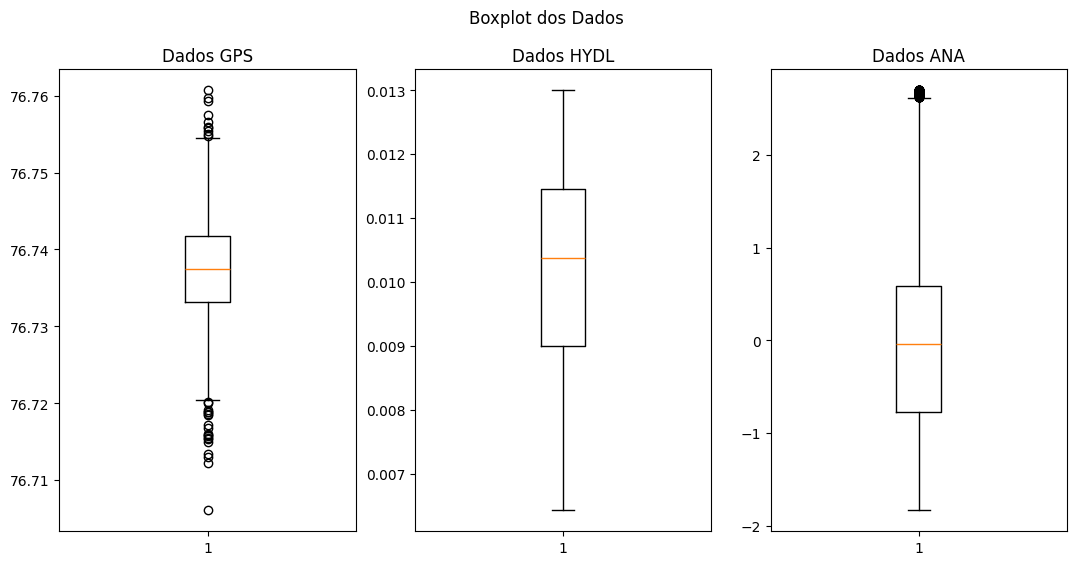

In [202]:
fig,ax = plt.subplots(1,3,figsize=(13,6))
ax[0].boxplot(gps['Up'])
ax[0].set_title("Dados GPS")
ax[1].boxplot(hydl['Up'])
ax[1].set_title("Dados HYDL")
ax[2].boxplot(pa_o['Up'])
ax[2].set_title("Dados ANA")
fig.suptitle('Boxplot dos Dados')
plt.show()